INFO: Elasticity coefficient: 0.2


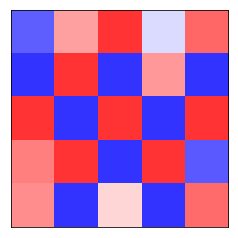

In [3]:
%matplotlib inline
from quake import Earthquake
from quake_visualizer import EarthquakeViewer
import matplotlib.pyplot as plt

from matplotlib import rc
rc('animation', html='html5')

steve = Earthquake(5, fth=3)
viewer = EarthquakeViewer(steve)
anim = viewer.animate(frames=200,interval=50)

In [4]:
anim

In [87]:
viewer = EarthquakeViewer(steve)

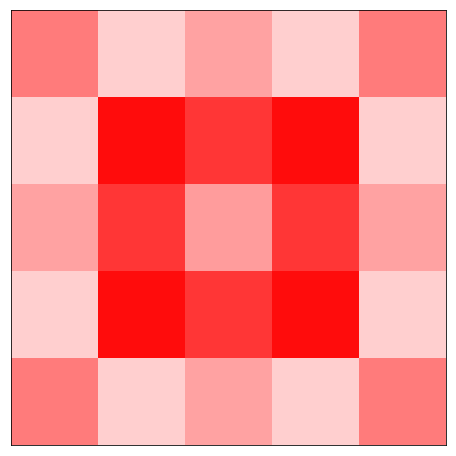

In [88]:
import matplotlib 
# print(matplotlib.rcParams.keys())
matplotlib.rcParams['figure.figsize'] = (8,8)
for i in range(20):
    viewer.draw()
    steve.step()
    plt.savefig('sim' + str(i+1) + '.png', format='png')

In [1]:
%matplotlib inline
from plot_quake import * 
from quake import Earthquake
import matplotlib
from thinkplot import *

INFO: Elasticity coefficient: 0.1
INFO: B = -1.03961683671


-1.0396168367111753

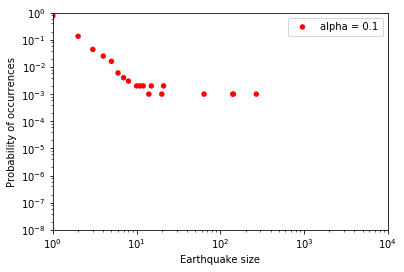

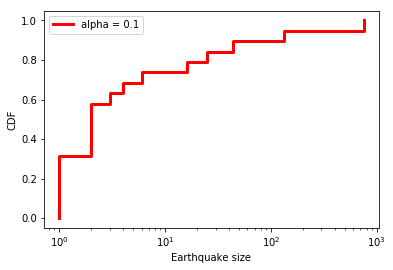

In [8]:
calculate_power_law(iters=1000,plot=True, n=35, fth=3, del_bottom=False, k1=1, kl=(1/.1 - 4), plot_options={'color': 'r','alpha':1})


INFO: Elasticity coefficient: 0.1
INFO: B = -1.09101153743
INFO: Elasticity coefficient: 0.15
INFO: B = -1.8375198918
INFO: Elasticity coefficient: 0.2
INFO: B = -1.26835594016
INFO: Elasticity coefficient: 0.25
INFO: B = -0.423031923474


-0.42303192347366303

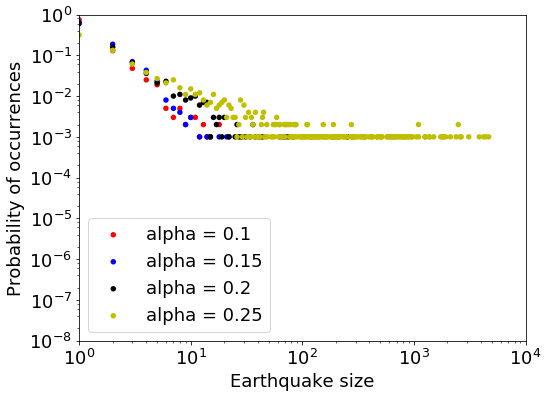

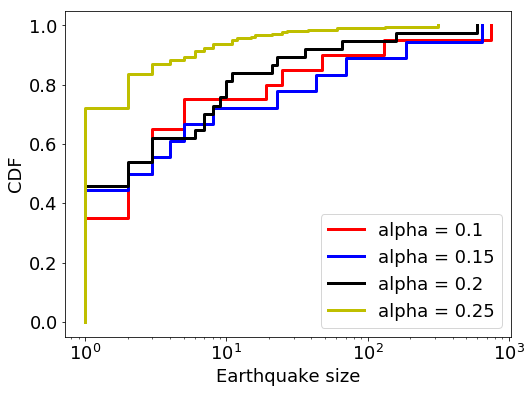

In [5]:

# calculate_power_law(iters=1000,plot=True, n=35, fth=3, k1=1, kl=(1/.1 - 4), del_bottom=True, plot_options={'color': 'b','alpha':1})

calculate_power_law(iters=1000000,plot=True, n=35, fth=3, del_bottom=False, k1=1, kl=(1/.1 - 4), plot_options={'color': 'r','alpha':1})
calculate_power_law(iters=1000000,plot=True, n=35, fth=3, del_bottom=False, k1=1, kl=(1/.15 - 4), plot_options={'color': 'b','alpha':1})
calculate_power_law(iters=1000000,plot=True, n=35, fth=3, del_bottom=False, plot_options={'color': 'k','alpha':1})
calculate_power_law(iters=1000000,plot=True, n=35, fth=3, del_bottom=False, k1=1, kl=(1/.25 - 4), plot_options={'color': 'y', 'alpha':1})
# Save('fig3', formats=['eps'])



INFO: Elasticity coefficient: 0.05
INFO: B = -1.39094331924
INFO: Elasticity coefficient: 0.0605263157895
INFO: B = -1.69394141548
INFO: Elasticity coefficient: 0.0710526315789
INFO: B = -2.15963272771
INFO: Elasticity coefficient: 0.0815789473684
INFO: B = -2.01978766014
INFO: Elasticity coefficient: 0.0921052631579
INFO: B = -1.87810669914
INFO: Elasticity coefficient: 0.102631578947
INFO: B = -2.63975486314
INFO: Elasticity coefficient: 0.113157894737
INFO: B = -2.63624552462
INFO: Elasticity coefficient: 0.123684210526
INFO: B = -2.70858181674
INFO: Elasticity coefficient: 0.134210526316
INFO: B = -2.64442966683
INFO: Elasticity coefficient: 0.144736842105
INFO: B = -2.51923573612
INFO: Elasticity coefficient: 0.155263157895
INFO: B = -2.3169309644
INFO: Elasticity coefficient: 0.165789473684
INFO: B = -2.27163289863
INFO: Elasticity coefficient: 0.176315789474
INFO: B = -1.97782811565
INFO: Elasticity coefficient: 0.186842105263
INFO: B = -1.97493421669
INFO: Elasticity coefficien

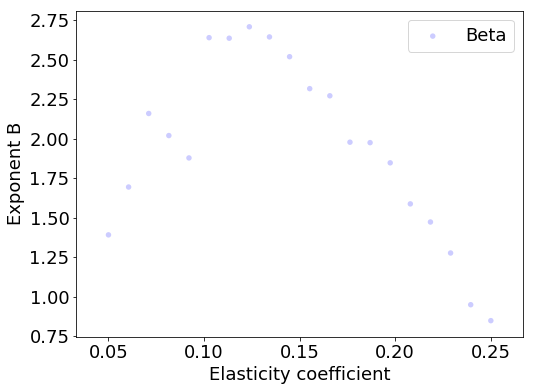

In [5]:
plot_power_law(n=35, iters=1000, fth=3, del_bottom=False)

INFO: Elasticity coefficient: 0.2


-0.82569939178856533

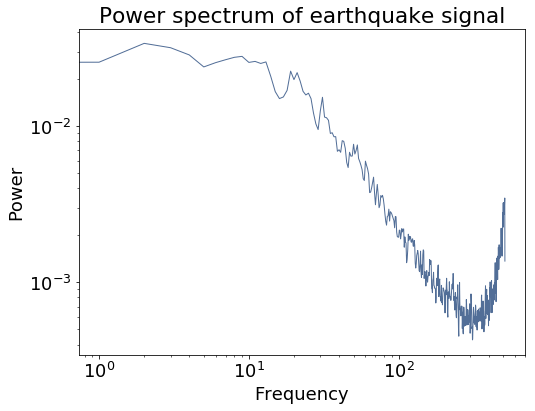

In [6]:
plot_frequency(iters=10000, plot=True, n=35)

INFO: Size: 10
INFO: Elasticity coefficient: 0.2
INFO: Size: 15
INFO: Elasticity coefficient: 0.2
INFO: Size: 20
INFO: Elasticity coefficient: 0.2
INFO: Size: 25
INFO: Elasticity coefficient: 0.2
INFO: Size: 30
INFO: Elasticity coefficient: 0.2
INFO: Size: 35
INFO: Elasticity coefficient: 0.2
INFO: Size: 40
INFO: Elasticity coefficient: 0.2
INFO: Size: 45
INFO: Elasticity coefficient: 0.2
INFO: Size: 50
INFO: Elasticity coefficient: 0.2
INFO: Size: 55
INFO: Elasticity coefficient: 0.2
INFO: Size: 60
INFO: Elasticity coefficient: 0.2
INFO: Size: 65
INFO: Elasticity coefficient: 0.2
INFO: Size: 70
INFO: Elasticity coefficient: 0.2
INFO: Size: 75
INFO: Elasticity coefficient: 0.2
INFO: Size: 80
INFO: Elasticity coefficient: 0.2
INFO: Size: 85
INFO: Elasticity coefficient: 0.2
INFO: Size: 90
INFO: Elasticity coefficient: 0.2
INFO: Size: 95
INFO: Elasticity coefficient: 0.2
INFO: Size: 100
INFO: Elasticity coefficient: 0.2
/home/matt/Documents/CompSci/project2/code/thinkplot.py:118: UserWar

[2.0168507975122769, 1.9841882929955035, 0.0, nan]

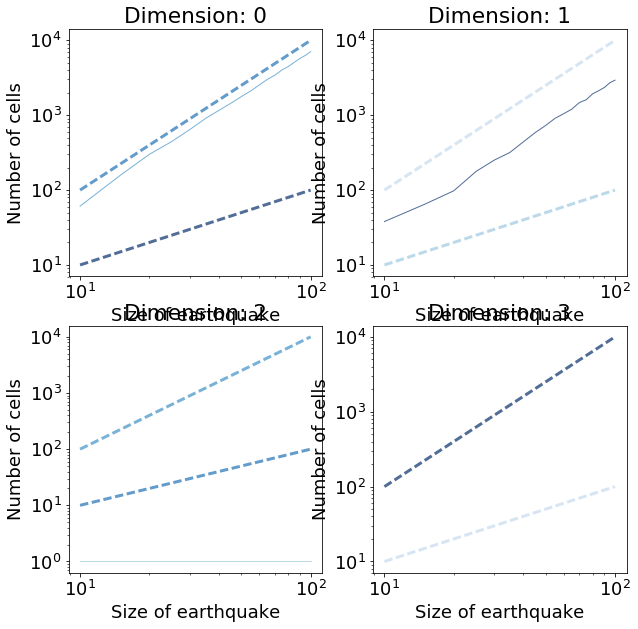

In [2]:
find_fractals(iters=10, plot=True)